<a href="https://colab.research.google.com/github/carranza96/DLSeminar/blob/master/notebooks/IntroDL_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install tensorflow==2.1
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt


     |████████████████████████████████| 421.8MB 39kB/s 
     |████████████████████████████████| 3.8MB 56.8MB/s 
     |████████████████████████████████| 450kB 71.5MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
# Fix random seed to allow reproducible experiments
np.random.seed(1)
tf.random.set_seed(1)

# Load and inspect MNIST data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print("Shape X_train: ", x_train.shape)
print("Shape y_train: ", y_train.shape)
print("Shape X_test: ", x_test.shape)
print("Shape y_test: ", y_test.shape)

Shape X_train:  (60000, 28, 28)
Shape y_train:  (60000,)
Shape X_test:  (10000, 28, 28)
Shape y_test:  (10000,)


Values of one instance

In [5]:
print("y:", y_train[0])
print("x:", x_train[0])

y: 5
x: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 25

Visualize some examples

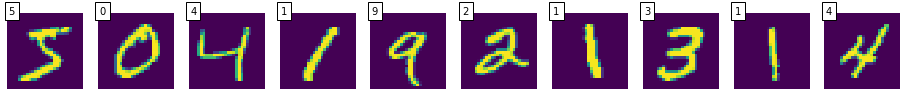

In [6]:
plt.figure(figsize=(16,8))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i])
    plt.text(0, 0, y_train[i], color='black', bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

Class frequency

In [7]:
from collections import Counter
Counter(y_train)

Counter({0: 5923,
         1: 6742,
         2: 5958,
         3: 6131,
         4: 5842,
         5: 5421,
         6: 5918,
         7: 6265,
         8: 5851,
         9: 5949})

In [0]:
NUM_CLASSES = 10

# Multi-Layer Perceptron

![texto alternativo](https://miro.medium.com/proxy/1*eloYEyFrblGHVZhU345PJw.jpeg)

## Data preprocessing

In [0]:
# Convert matrices to vector (images are 28x28 pixels)
X_train = x_train.reshape(60000, 784) # 28 * 28 = 784
X_test = x_test.reshape(10000, 784)

In [0]:
# Normalize data
# Transform from range [0., 255. ] to range [0., 1.]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [11]:
# Transform y to one-hot enconding vectors
from keras.utils import np_utils
Y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
Y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

Using TensorFlow backend.


In [12]:
# Show example of one-hot enconding vector
print("Class of first example:", y_train[0])
print("One-hot enconding:")
print(list(range(NUM_CLASSES)))
print(Y_train[0])

Class of first example: 5
One-hot enconding:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


NOTE: One-hot encoding not strictly necessary, it depends on the selected loss function.

If categorical_cross_entropy -> one-hot enconding

If sparse_categorical_cross_entropy -> integer class

## Create model

In [0]:
# Create model with three dense layers
inp = Input(shape=(784,)) # Input vector shape (28x28=784)
x = Dense(64, activation='relu', use_bias=True)(inp)  
x = Dense(128, activation='relu', use_bias=True)(x)
x = Dense(NUM_CLASSES, activation='softmax')(x) # 10 output neurons, one associated to each digit. Softmax activation function

model = keras.Model(inputs=inp, outputs=x)
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.01), 
              metrics=['accuracy'])


## Train model

In [14]:
history = model.fit(X_train, Y_train,
          batch_size=64,
          epochs=20,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 75us/sample - loss: 0.9509 - accuracy: 0.7476 - val_loss: 0.4205 - val_accuracy: 0.8883
Epoch 2/20
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3828 - accuracy: 0.8926 - val_loss: 0.3217 - val_accuracy: 0.9094
Epoch 3/20
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3218 - accuracy: 0.9079 - val_loss: 0.2948 - val_accuracy: 0.9149
Epoch 4/20
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2911 - accuracy: 0.9160 - val_loss: 0.2675 - val_accuracy: 0.9240
Epoch 5/20
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2684 - accuracy: 0.9225 - val_loss: 0.2489 - val_accuracy: 0.9284
Epoch 6/20
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2495 - accuracy: 0.9278 - val_loss: 0.2324 - val_accuracy: 0.9357
Epoch 7/20
60000/60000 [==============================] 

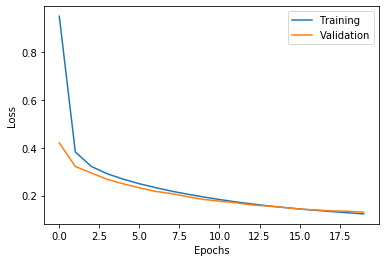

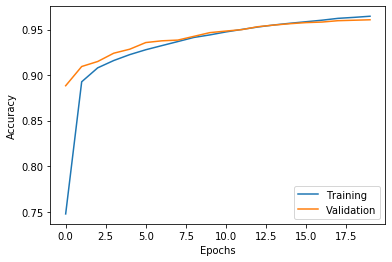

In [15]:
## Visualize training stats 

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

## Evaluate model


In [16]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1303067702718079
Test accuracy: 0.9607


### Visualize predictions

In [0]:
predictions = model.predict(X_test)

In [18]:
# Example of predictions for first image
# Output is vector of size 10, one value for each digit. Maximum value is the predicted digit
predictions[0]

array([1.5569423e-05, 3.1117870e-07, 2.0158490e-04, 2.8442927e-03,
       1.5543132e-07, 4.0675135e-05, 6.0582966e-10, 9.9680293e-01,
       4.0006221e-06, 9.0454385e-05], dtype=float32)

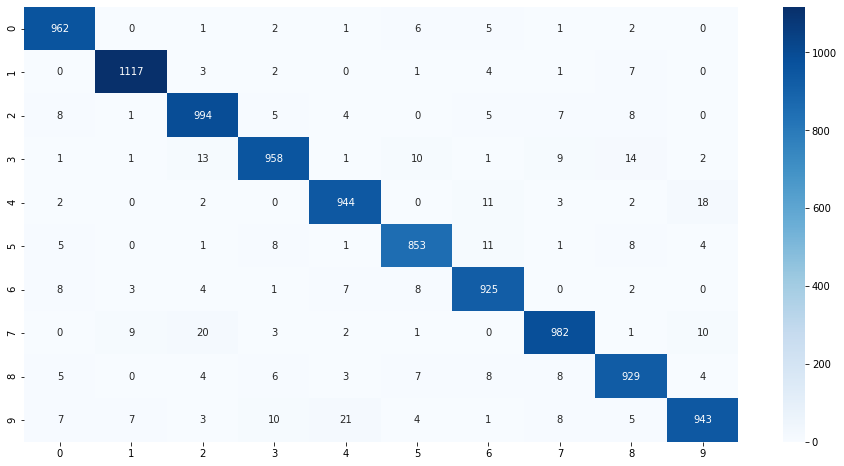

In [19]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns


df = pd.DataFrame(confusion_matrix(np.argmax(Y_test,axis=1), np.argmax(predictions,axis=1)), columns=list(range(10)))
plt.figure(figsize=(16,8))
sns.heatmap(df, annot=True, fmt='g', cmap="Blues")

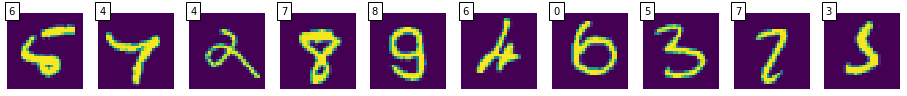

In [20]:
## Visualize some wrong predictions 
integer_predictions = np.argmax(predictions,axis=1)
integer_labels = np.argmax(Y_test,axis=1)
wrong_predictions_indices = np.where( integer_predictions !=  integer_labels)[0]
plt.figure(figsize=(16,8))
for i in range(10):
    index = wrong_predictions_indices[i]
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test[index])
    plt.text(0, 0, integer_predictions[index], color='black', bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

### MLP with Dropout



In [21]:
inp = Input(shape=(784,))
x = Dense(64, activation='relu', use_bias=True)(inp)  
x = Dropout(0.2)(x)
x = Dense(128, activation='relu', use_bias=True)(x)
x = Dropout(0.2)(x)
x = Dense(NUM_CLASSES, activation='softmax')(x) # 10 output neurons, one associated to each digit. Softmax activation function

model = keras.Model(inputs=inp, outputs=x)

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.01), 
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
          batch_size=64,
          epochs=20,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 54us/sample - loss: 1.2557 - accuracy: 0.6151 - val_loss: 0.5237 - val_accuracy: 0.8683
Epoch 2/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.6010 - accuracy: 0.8193 - val_loss: 0.3681 - val_accuracy: 0.8995
Epoch 3/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.4753 - accuracy: 0.8599 - val_loss: 0.3146 - val_accuracy: 0.9113
Epoch 4/20
60000/60000 [==============================] - 3s 48us/sample - loss: 0.4140 - accuracy: 0.8783 - val_loss: 0.2813 - val_accuracy: 0.9171
Epoch 5/20
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3740 - accuracy: 0.8902 - val_loss: 0.2536 - val_accuracy: 0.9262
Epoch 6/20
60000/60000 [==============================] - 3s 48us/sample - loss: 0.3463 - accuracy: 0.8987 - val_loss: 0.2366 - val_accuracy: 0.9313
Epoch 7/20
60000/60000 [==============================] 

### How to improve results?

*   Adjust parameters in dense layers (number of neurons, activation function)
*   Add more dense layers
*   Dropout
*   Change optimizer: SGD, Adam, Adagrad, RMSProp
*   Change architecture: CNN, LSTM





# Convolutional Neural Network

![texto alternativo](https://miro.medium.com/max/3744/1*SGPGG7oeSvVlV5sOSQ2iZw.png)

## Preprocessing

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Input shape now is 3-dimensional (num_examples, 28, 28, 1). We need to reshape to indicate number of channels
X_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# One-hot encoding
Y_train = keras.utils.to_categorical(y_train, 10)
Y_test = keras.utils.to_categorical(y_test, 10)

## Create CNN model

In [25]:
# Conv2D with con 32 convolutional filters with kernel size 3x3
inp = Input(shape=input_shape)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(inp)
x = Flatten()(x)    # Convert from matrices to vector before Fully Connected Layers
x = Dense(NUM_CLASSES, activation='softmax')(x)

model = keras.Model(inputs=inp, outputs=x)

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=['accuracy'])

# Print model architecture
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                250890    
Total params: 251,210
Trainable params: 251,210
Non-trainable params: 0
_________________________________________________________________


## Train CNN

In [26]:
hist = model.fit(X_train, Y_train, batch_size=64, 
                 epochs=20, verbose=1, 
                 validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 128us/sample - loss: 0.5212 - accuracy: 0.8669 - val_loss: 0.3099 - val_accuracy: 0.9148
Epoch 2/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3167 - accuracy: 0.9094 - val_loss: 0.2875 - val_accuracy: 0.9187
Epoch 3/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2945 - accuracy: 0.9155 - val_loss: 0.2854 - val_accuracy: 0.9165
Epoch 4/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2805 - accuracy: 0.9202 - val_loss: 0.2658 - val_accuracy: 0.9240
Epoch 5/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2663 - accuracy: 0.9251 - val_loss: 0.2488 - val_accuracy: 0.9290
Epoch 6/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2512 - accuracy: 0.9297 - val_loss: 0.2423 - val_accuracy: 0.9303
Epoch 7/20
60000/60000 [==============================]

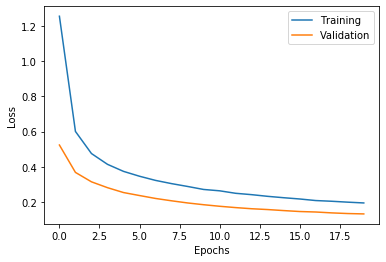

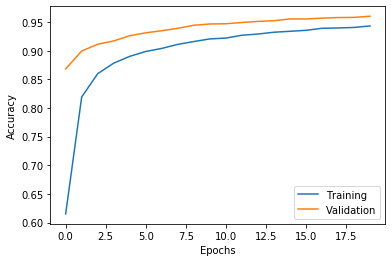

In [27]:
## Visualize training stats 
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

## Evaluate model

In [28]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09645904383100569
Test accuracy: 0.9722


## Visualize predictions

In [0]:
predictions = model.predict(X_test)

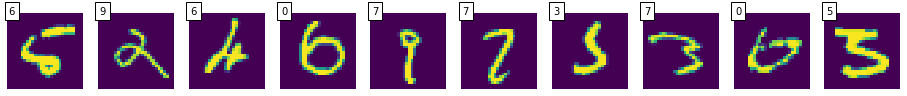

In [30]:
## Visualize some wrong predictions 
integer_predictions = np.argmax(predictions,axis=1)
integer_labels = np.argmax(Y_test,axis=1)
wrong_predictions_indices = np.where( integer_predictions !=  integer_labels)[0]
plt.figure(figsize=(16,8))
for i in range(10):
    index = wrong_predictions_indices[i]
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test[index])
    plt.text(0, 0, integer_predictions[index], color='black', bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

## Exercise: Create CNN model with the following characteristics

2 convolution+pooling blocks with increasing number of filters and relu activation function

Dropout after convolution

Fully connected block at the end

Change optimizer (search in Keras docs for available optimizers)






In [0]:
# inp =
# x = 

# model = keras.Model(...)


# model.compile(...)


        
#  hist = model.fit(X_train, Y_train, batch_size=64, 
#                  epochs=5, verbose=1, 
#                  validation_data=(X_test, Y_test))